In [1]:
import pandas as pd

# Use your actual file path
file_path = r"C:\GITHUB\Fraud detection\archive\creditcard.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display dataset info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Check for missing values
print("Missing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


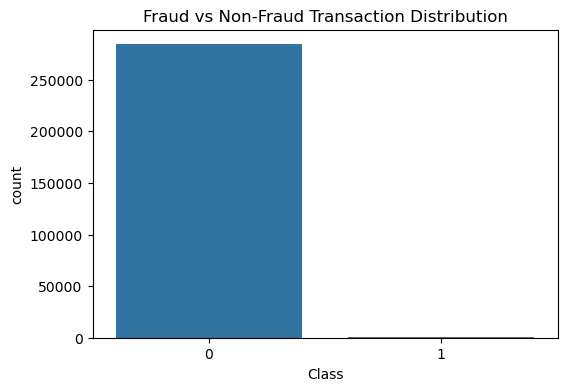

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraud (1) vs. non-fraud (0)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()

# Print actual numbers
print(df['Class'].value_counts(normalize=True) * 100)


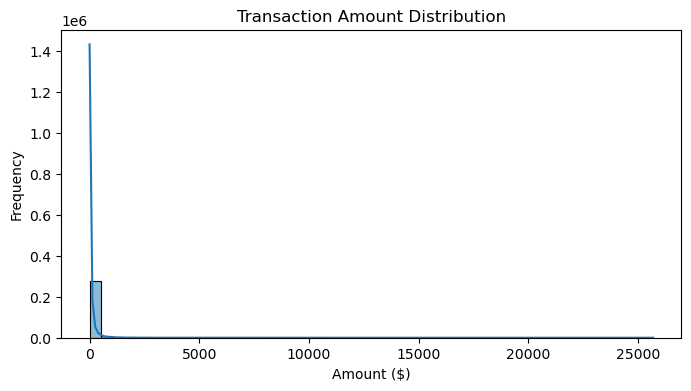

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()


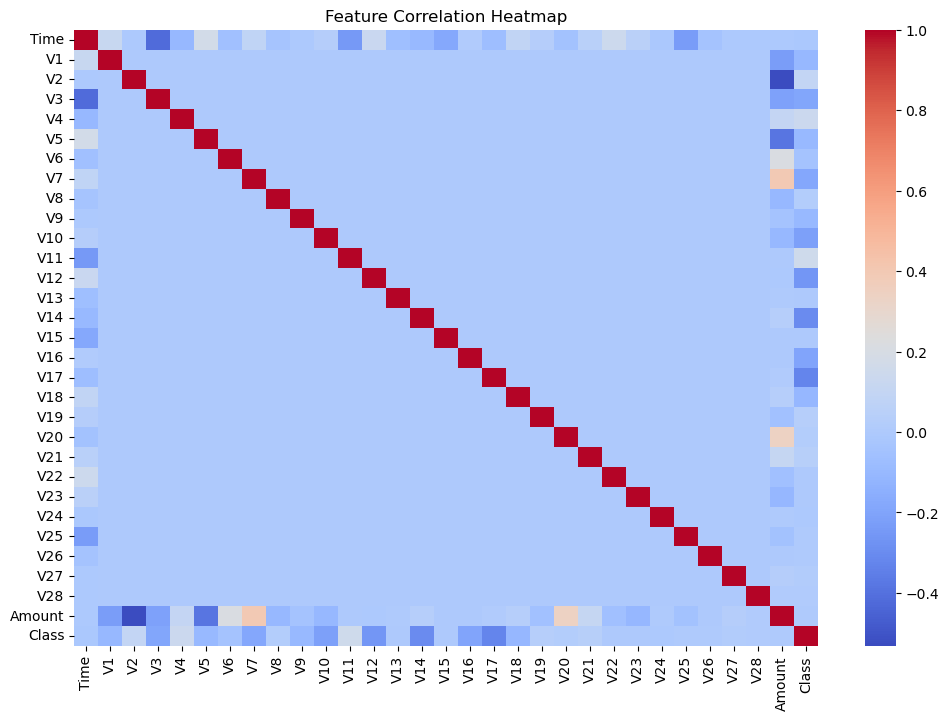

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
import pandas as pd

# Compute correlation of features with fraud (Class = 1)
correlation = df.corr()['Class'].drop('Class')  # Drop self-correlation
correlation_sorted = correlation.abs().sort_values(ascending=False)  # Sort by absolute value

# Display top features most correlated with fraud
print("Top Features Most Correlated with Fraud:\n", correlation_sorted.head(10))


Top Features Most Correlated with Fraud:
 V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64


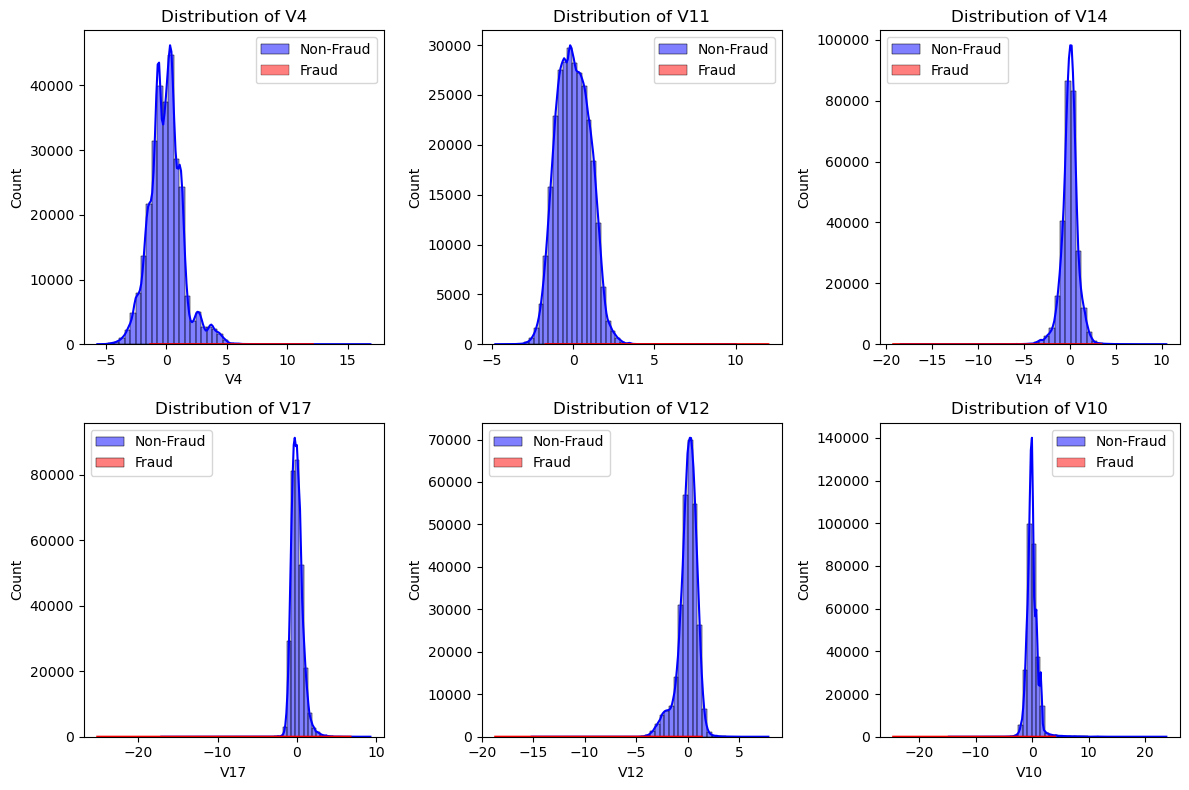

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 6 most correlated features (modify based on correlation results)
top_features = ['V4', 'V11', 'V14', 'V17', 'V12', 'V10']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature][df["Class"] == 0], label="Non-Fraud", kde=True, color="blue", bins=50)
    sns.histplot(df[feature][df["Class"] == 1], label="Fraud", kde=True, color="red", bins=50)
    plt.legend()
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Top 10 Most Important Features for Fraud Detection:
 V17    0.157526
V12    0.134800
V14    0.124608
V10    0.081166
V16    0.074635
V11    0.057927
V9     0.034041
V7     0.029772
V18    0.028322
V4     0.026813
dtype: float64


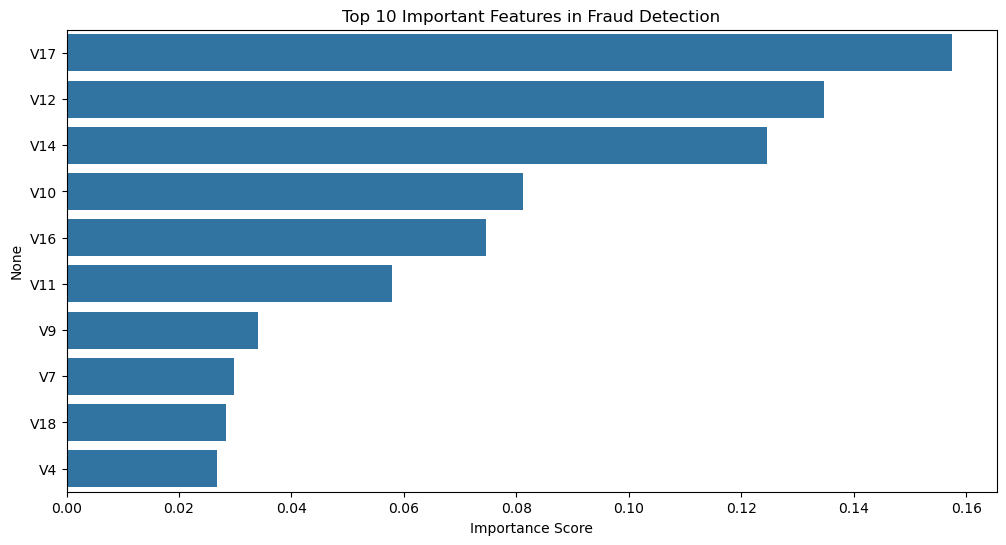

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data (remove 'Class' for features, keep 'Class' as target)
X = df.drop(columns=['Class'])
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Display top 10 important features
print("Top 10 Most Important Features for Fraud Detection:\n", importances_sorted.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances_sorted[:10], y=importances_sorted.index[:10])
plt.title("Top 10 Important Features in Fraud Detection")
plt.xlabel("Importance Score")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Prepare data (features & target)
X = df.drop(columns=['Class'])  # Features (remove 'Class')
y = df['Class']  # Target variable (fraud or not)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (normalize for better model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance fraud cases
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Data Preprocessing Done! ✅")


Data Preprocessing Done! ✅


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9745795442575752
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("🔹 Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))  # Important for fraud detection
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Classifier Results:
Accuracy: 0.9995962220427653
Precision: 0.9120879120879121
Recall: 0.8469387755102041
F1 Score: 0.8783068783068783
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
# Evaluate on training set
y_train_pred_rf = rf_model.predict(X_train)

print("🔹 Random Forest Classifier Training Performance:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Precision:", precision_score(y_train, y_train_pred_rf))
print("Recall:", recall_score(y_train, y_train_pred_rf))
print("F1 Score:", f1_score(y_train, y_train_pred_rf))


🔹 Random Forest Classifier Training Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    max_depth=10,       # Limit tree depth
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,  # Minimum samples per leaf
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [14]:
# Evaluate on training set
y_train_pred_rf = rf_model.predict(X_train)
print("🔹 Random Forest Classifier Training Performance:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Precision:", precision_score(y_train, y_train_pred_rf))
print("Recall:", recall_score(y_train, y_train_pred_rf))
print("F1 Score:", f1_score(y_train, y_train_pred_rf))

# Evaluate on test set
y_pred_rf = rf_model.predict(X_test)
print("🔹 Random Forest Classifier Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


🔹 Random Forest Classifier Training Performance:
Accuracy: 0.9895493974526381
Precision: 0.9983039090644649
Recall: 0.9807650878650787
F1 Score: 0.9894567825666547
🔹 Random Forest Classifier Test Performance:
Accuracy: 0.9976826656367402
Precision: 0.4182692307692308
Recall: 0.8877551020408163
F1 Score: 0.5686274509803921


In [15]:
import numpy as np

# Get fraud probabilities instead of binary predictions
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get fraud probabilities

# Adjust threshold from 0.5 to a higher value (e.g., 0.6 or 0.7)
threshold = 0.6
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

# Recalculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

print("🔹 Adjusted Threshold Results (Threshold =", threshold, ")")
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("F1 Score:", f1_score(y_test, y_pred_adjusted))


🔹 Adjusted Threshold Results (Threshold = 0.6 )
Precision: 0.6323529411764706
Recall: 0.8775510204081632
F1 Score: 0.7350427350427351


In [17]:
threshold = 0.8  # Try a higher value
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

print("🔹 Adjusted Threshold Results (Threshold =", threshold, ")")
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("F1 Score:", f1_score(y_test, y_pred_adjusted))


🔹 Adjusted Threshold Results (Threshold = 0.8 )
Precision: 0.8764044943820225
Recall: 0.7959183673469388
F1 Score: 0.8342245989304813


In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Classifier Results:")
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


C:\Users\sami3\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Classifier Results:
Precision: 0.7980769230769231
Recall: 0.8469387755102041
F1 Score: 0.8217821782178217


In [19]:
from sklearn.feature_selection import SelectFromModel

# Use Random Forest to find important features
selector = SelectFromModel(rf_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Retrain Random Forest with fewer features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_model_selected.predict(X_test_selected)

print("🔹 Feature Selection Results:")
print("Precision:", precision_score(y_test, y_pred_selected))
print("Recall:", recall_score(y_test, y_pred_selected))
print("F1 Score:", f1_score(y_test, y_pred_selected))


🔹 Feature Selection Results:
Precision: 0.725
Recall: 0.8877551020408163
F1 Score: 0.7981651376146789


In [20]:
import joblib

# Define file path
model_path = r"C:\GITHUB\Fraud detection\archive\fraud_detection_rf_model.pkl"

# Save the trained model
joblib.dump(rf_model, model_path)

print(f"✅ Model saved at: {model_path}")


✅ Model saved at: C:\GITHUB\Fraud detection\archive\fraud_detection_rf_model.pkl


In [24]:
import requests

url = "http://127.0.0.1:8000/predict"  # Make sure this matches your FastAPI port

test_data = {
    "features": [
        0.1, -1.2, 0.3, 2.1, -0.4, 1.2, -0.8, 3.5, 0.9, -2.1,
        1.7, 0.2, -0.9, 2.4, -0.7, 0.3, 1.1, -1.3, 2.9, -0.5,
        0.6, -1.0, 3.2, 0.1, -2.4, 1.8, 0.2, 150, 500, 0.0
    ]
}

response = requests.post(url, json=test_data)

if response.status_code == 200:
    print("✅ Success! Prediction:", response.json())
else:
    print("❌ Error:", response.text)


✅ Success! Prediction: {'fraud_prediction': 0}
